In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

#Cargar Datos
Data = pd.read_csv('Car details v3.csv')

#Mostrar Datos
Data.head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [21]:
#Descripcion de los datos
Data.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [22]:
# Manejar datos faltantes
Data.replace(0, np.nan, inplace=True)
Data.fillna(Data.mean(numeric_only=True), inplace=True)
Data.fillna('NA',inplace=True)

In [23]:
#Mostrar Datos
Data.head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [24]:
# Confirmacion de columnas
print(Data.columns)

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')


<Axes: xlabel='km_driven'>

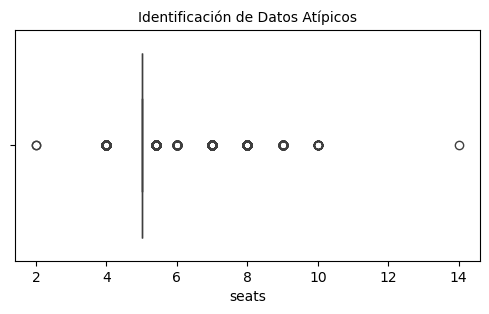

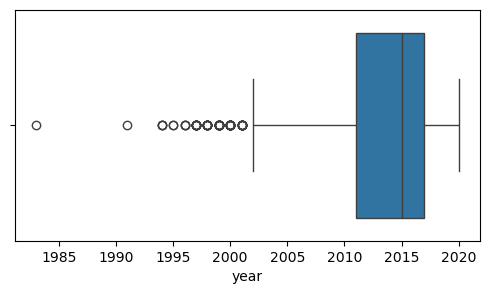

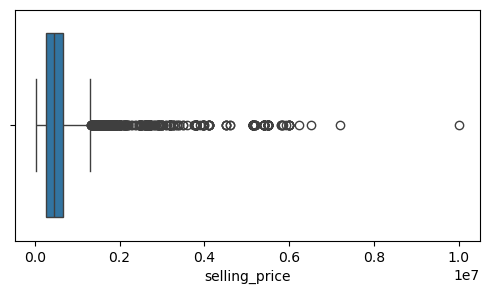

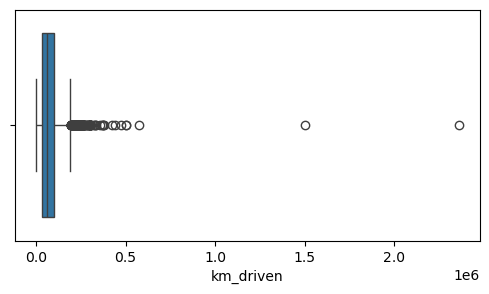

In [25]:
# Análisis exploratorio de datos

# Variable "asientos"
plt.figure(figsize=(6, 3))
sns.boxplot(x=Data['seats'])
plt.title('Identificación de Datos Atípicos', fontsize=10)

# Variable "ano"
plt.figure(figsize=(6, 3))
sns.boxplot(x=Data['year'])

# Variable "precio_de venta"
plt.figure(figsize=(6, 3))
sns.boxplot(x=Data['selling_price'])

# Variable "km_recorridos"
plt.figure(figsize=(6, 3))
sns.boxplot(x=Data['km_driven'])

In [26]:
# Definir límites para datos atípicos
max_asientos = 10
min_asientos = 2
total_asientos = ((Data['seats'] < min_asientos) | (Data['seats'] > max_asientos)).sum()

max_ano = 2020
min_ano = 1990
total_ano = ((Data['year'] < min_ano) | (Data['year'] > max_ano)).sum()

print("Total registros dataset: {}".format(len(Data)))
print("El total de datos atípicos para la cantidad de asientos es {}".format(total_asientos))
print("El total de datos atípicos para el año es {}".format(total_ano))
print("")
Data.info()

Total registros dataset: 8128
El total de datos atípicos para la cantidad de asientos es 1
El total de datos atípicos para el año es 1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        8128 non-null   object 
 9   engine         8128 non-null   object 
 10  max_power      8128 non-null   object 
 11  torque         8128 non-null   object 
 12  seats          8128 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [27]:
#Ajustar columnas tipo object para poder procesarlos en el modelo

data_numerica = Data.copy()
for column in data_numerica.columns:
    if data_numerica[column].dtype == 'object':
        label_encoder = LabelEncoder()
        data_numerica[column] = label_encoder.fit_transform(data_numerica[column])

In [30]:
# Dividir los datos en conjunto de entrenamiento y prueba
X = data_numerica.drop('selling_price', axis=1)
Y = data_numerica['selling_price']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)


In [31]:
#Validar datos en train
X_train.head(2)

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
4313,704,2012,40000,3,1,1,0,251,10,255,32,5.0
5178,1464,2007,120000,3,1,0,0,23,51,128,240,5.0


In [32]:
#Validar datos en test
X_test.head(2)

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
3558,776,2013,40000,1,1,1,0,305,24,294,221,5.0
233,976,2013,70000,1,1,1,0,46,95,103,315,7.0


In [33]:
# Crear y entrenar el modelo de regresión lineal
modelo_regresion = LinearRegression()
modelo_regresion.fit(X_train, Y_train)

LinearRegression()

In [34]:
# Realizar predicciones
Prediccion = modelo_regresion.predict(X_test)

In [35]:
# Evaluar el modelo
print('Coeficientes:', modelo_regresion.coef_)
print('Error cuadrático medio:', mean_squared_error(Y_test, Prediccion))
print('Coeficiente de determinación (R^2):', r2_score(Y_test, Prediccion))

Coeficientes: [-1.00604821e+02  6.70144325e+04 -7.24706842e-01 -2.04606278e+05
 -3.05281213e+05 -9.90953009e+05 -1.50228853e+04 -1.86662938e+03
  1.41664748e+03  1.14532903e+02  6.34713937e+02 -9.44658378e+04]
Error cuadrático medio: 321949387814.6949
Coeficiente de determinación (R^2): 0.5124766820593034


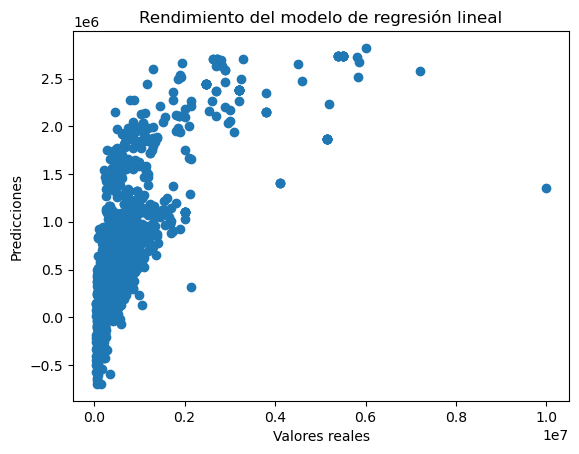

In [36]:
# Visualizar el rendimiento del modelo
plt.scatter(Y_test, Prediccion)
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.title("Rendimiento del modelo de regresión lineal")
plt.show()